# Trame série avec Tkinter

Tkinter avec fenêtre et interface graphique

In [3]:
#!/usr/local/bin/python3
# coding: utf-8

import tkinter as tk
#au maximum on prévoit 13 bits dont 2 repos
lx=[x//2 for x in range(3,29)] # lx=[1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14]

def aff_dhbC(decimal):
    raz()
    Dsaisie.insert( 0, decimal)
    hexa=hex(int(decimal))[2:]
    Hsaisie.insert( 0, hexa)
    taille = checkbit.get() # connaitre le nb de bits
    nb='{:0'+str(taille)+'b}' # 7 ou 8 bits
    bits=nb.format(int(decimal))
    Bsaisie.insert( 0, bits)
    car=chr(int(decimal))
    Csaisie.insert( 0, car)
    return bits

res='Bits transmis : '
ancien={}

def get_values():
    values = {
        "C": Csaisie.get(),
        "D": Dsaisie.get(),
        "H":Hsaisie.get(),
        "B":Bsaisie.get()
        }
    return values

def convertir():
    global ancien
    saisies = get_values()
    if saisies.get("C") !='' and saisies.get("C") != ancien.get("C"):
        dec=str(ord(saisies.get("C")))
    elif saisies.get("D") !='' and saisies.get("D") != ancien.get("D") :
        dec=str(saisies.get("D"))
    elif saisies.get("H") !='' and saisies.get("H") != ancien.get("H") :
        dec=str(int(saisies.get("H"),16))
    elif saisies.get("B") !='' and saisies.get("B") != ancien.get("B") :
        dec=str(int(saisies.get("B"),2))
    else:
        dec=str(ord(saisies.get("C")))
    binaire=aff_dhbC(dec)
    saisies = get_values()
    taille = checkbit.get()
    #print(taille,binaire,len(binaire))
    ancien=saisies.copy()
    if taille : # un des 2 choix validé pour nb bits
        binaire='0'*(taille-len(binaire))+binaire
        mot='0'+binaire[::-1] #bit de start
        parite = checkpar.get()
        if parite :
            bit_par= (sum([int(i) for i in mot])%2) ^(parite %2)
            mot+=str(bit_par) # avec la parité
        mot+='1' #bit de stop
        Rlabel.config(text=res+mot) # affiche les bits transmis 
        can.delete(tk.ALL)
        ly=[1,1] #on met les 2 valeurs pour le repos
        for i in mot:
            ly.append(int(i))
            ly.append(int(i))
        ly.append(1) #stop et fin trame
        ly.append(1)
        kx,ky=20,80
        Lx=[2*kx*x for x in lx]
        Ly=[3*ky-2*ky*y for y in ly]
        l=list(zip(Lx,Ly))
        t=tuple(l)
        can.create_line(t)
        nom=["REPOS","START","Parité","STOP"]
        texte=["\n".join([i for i in n]) for n in nom] #nom en vertical
        can.create_text(3*kx,2*ky,text=texte[0])
        can.create_text(5*kx,2*ky,text=texte[1])
        for i in range(taille) :
            data = 'D\n'+str(i)+'\n'
            can.create_text(7*kx+2*kx*i,2*ky,text=data)
        if parite :
            i+=1
            can.create_text(7*kx+2*kx*i,2*ky,text=texte[2])
        can.create_text(9*kx+2*kx*i,2*ky,text=texte[3])
        can.create_text(11*kx+2*kx*i,2*ky,text=texte[0])
def raz():
    Dsaisie.delete(0,10)
    Hsaisie.delete(0,10)
    Bsaisie.delete(0,30)
    Csaisie.delete(0,10)

fen=tk.Tk()
fen.title("Trame Liaison Série")
checkbit= tk.IntVar()
checkpar= tk.IntVar()
checkbit.set(8) # 8 bits par défaut
checkpar.set(0) # pas de parité par défaut

# choix du nombre de bits 7 ou 8
tk.Label(fen,text="Nombre de bits").grid(row=0,column=0)
checkBox7 = tk.Checkbutton(fen, variable=checkbit, onvalue=7, offvalue=0, text="7").grid(row=0,column=1)
checkBox8 = tk.Checkbutton(fen, variable=checkbit, onvalue=8, offvalue=0, text="8").grid(row=0,column=2)

# Parité None Even Odd
tk.Label(fen,text="Parité").grid(row=1,column=0)
checkBox0 = tk.Checkbutton(fen, variable=checkpar, onvalue=2, offvalue=0, text="Even Paire").grid(row=1,column=1)
checkBox1 = tk.Checkbutton(fen, variable=checkpar, onvalue=1, offvalue=0, text="Odd Impaire").grid(row=1,column=2)
checkBox2 = tk.Checkbutton(fen, variable=checkpar, onvalue=0, offvalue=0, text="None").grid(row=1,column=3)

# Texte du choix de l'entrée 
tk.Label(fen,text="Caractère").grid(row=2,column=0)
tk.Label(fen,text="Décimal").grid(row=3,column=0)
tk.Label(fen,text="Hexadécimal").grid(row=4,column=0)
tk.Label(fen,text="Binaire").grid(row=5,column=0)

# Lecture des entrées 
Csaisie=tk.Entry(fen)
Csaisie.grid(row=2,column=1, columnspan=3)
Dsaisie=tk.Entry(fen)
Dsaisie.grid(row=3,column=1, columnspan=3)
Hsaisie=tk.Entry(fen)
Hsaisie.grid(row=4,column=1, columnspan=3)
Bsaisie=tk.Entry(fen)
Bsaisie.grid(row=5,column=1, columnspan=3)

#Zone de la trame série
can=tk.Canvas(fen,bg='white',height=320,width=640)
can.grid(row=6,column=0, columnspan=4)

#Barre du bas 
Bconvertir=tk.Button(fen,text="Convertir",command=convertir)
Bconvertir.grid(row=7,column=0)
Braz=tk.Button(fen,text="RAZ",command=raz)
Braz.grid(row=7,column=1)

Rlabel=tk.Label(fen,text=res) #texte des bits transmis
Rlabel.grid(row=7,column=2, columnspan=2) #emplacement 

fen.mainloop() #fin de la fenêtre Tk


# Trames série plus longues avec pylab

In [30]:
#!/usr/bin/python3
# coding: utf-8
import pylab
import sys

def serialisation(nb,b,parite) :
    n=bin(nb)[2:]	#conversion en binaire et on enlève '0b'
    n='0'*(b-len(n))+n #on remplit les 0 manquants pour avoir 8 bits 
    n=n[::-1]	#on inverse l'ordre des 8 bits D0-D7
    if parite :
        bit_par= (sum([int(i) for i in n])%2) ^(parite %2)
        n+=str(bit_par) # avec la parité
    n='0'+n+'1' 
    # n : b bits dont parité, 1 bit start + 1 bit stop
    return n
def affichage(trame,taille,parite,temps) :
    #lx=[x//2 for x in range(3,7+2*len(trame))]
    lx=[temps*(x//2) for x in range(3,7+2*len(trame))]
    ly=[1,1] #les points pour y (repos debut)
    for i in trame:
        ly.append(int(i))
        ly.append(int(i))
    ly.append(1)
    ly.append(1) #repos final
    x = pylab.array(lx)
    y = pylab.array(ly)
    pylab.plot(x,y)
    pylab.text(1.5, 0.5, "repos", fontsize=12,rotation=90)
    for i in range(len(trame)//taille):
        for j in range(taille) :
            if (j == 0) :
                pylab.text(temps*(2.5+j+i*taille), 0.5, "start", fontsize=12,rotation=90)
            elif (j==taille-1):
                pylab.text(temps*(2.5+j+i*taille), 0.5, "stop", fontsize=12,rotation=90)
            elif parite and (j==taille-2):
                pylab.text(temps*(2.5+j+i*taille), 0.5, "parité", fontsize=12,rotation=90)
            else :
                t=f'D{j-1}'
                pylab.text(temps*(2.5+j+i*taille), 0.5, t, fontsize=12,rotation=90)
    pylab.text(temps*(2.5+len(trame)), 0.5, "repos", fontsize=12,rotation=90)
    pylab.text(temps*len(trame)/2,-0.22, "temps en µs (microsecondes)")
    pylab.gcf().set_size_inches(20, 5)
    pylab.show()

def graphes_serie(a,b,c,l):
    print(a,b,c,l)
    bit=int(a)
    lmot=bit+2
    if (b.lower() == 'n')  :
        par = 0
    elif (b.lower() == 'o') or (b.lower() == 'i') :
        par = 1
        lmot+=1
    elif (b.lower() == 'e') or (b.lower() == 'p') :
        par = 2
        lmot+=1
    else :
        print("Erreur la parité doit être N O ou I E ou P ")
        sys.exit(1)        
    s=''
    periode=1e6/int(c)
    for x in l :
        if x.isalpha():
            x=ord(x)
        elif not x.isnumeric() :
            print("Erreur trame")
            sys.exit(1)
        s+=serialisation(int(x),bit,par)
        print(hex(int(x)),end=' ')
    affichage(s,lmot,par,periode)

#-----------main-------------
# exemple python3 serie_affichage_python.py 8 N 1200 S 10 13
# graphes_serie(8,'N',1200,('a','b','10','13'))

7 E 1200 ('a', 'b', '10', '13')
0x61 0x62 0xa 0xd 

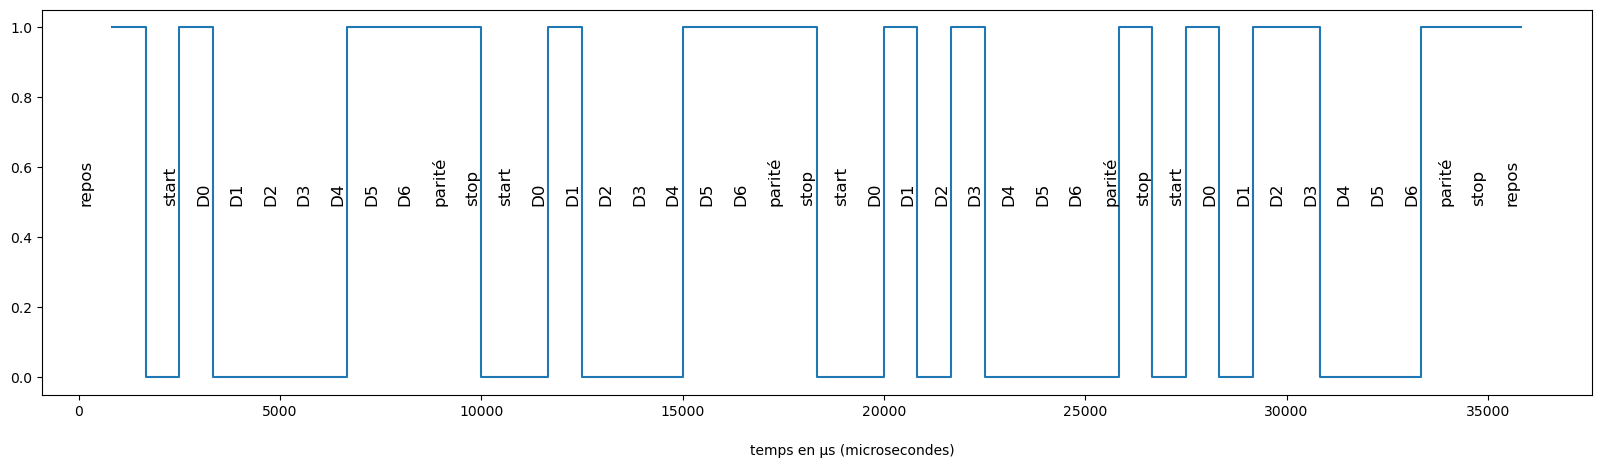

In [31]:
graphes_serie(7,'E',1200,('a','b','10','13'))

8 N 9600 SIN
0x53 0x49 0x4e 

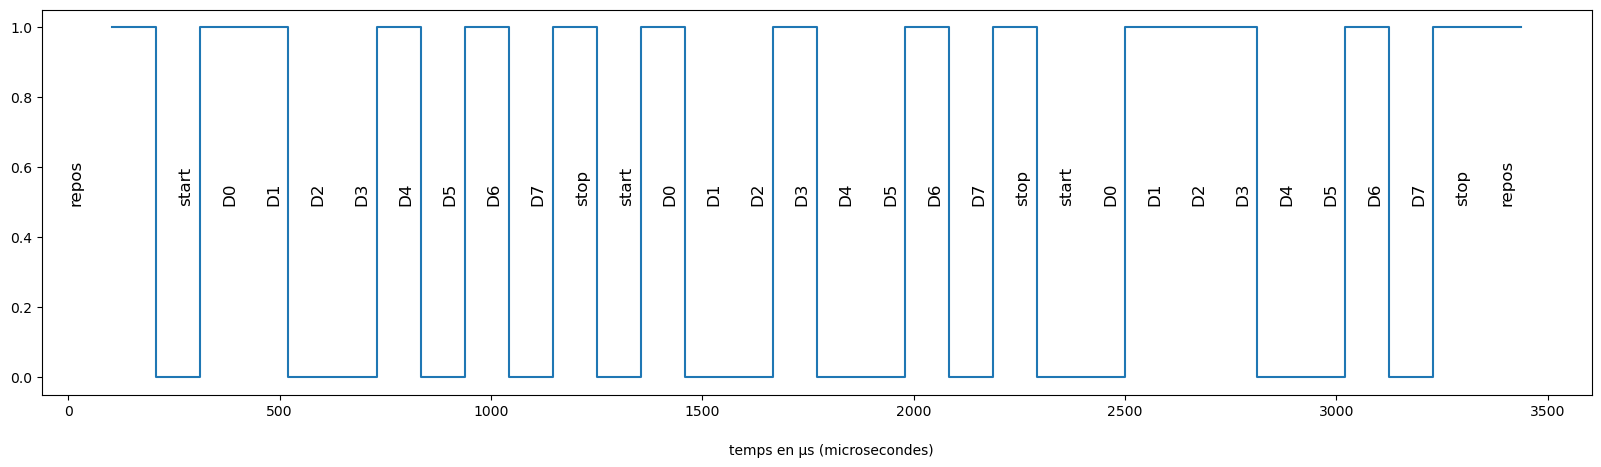

In [32]:
graphes_serie(8,'N',9600,"SIN")